<a href="https://colab.research.google.com/github/henryr27/Final-Project-Repository/blob/main/Final_Project_Henry_Riley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Sprinting Scrutiny**
Henry Riley

In [22]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import urllib


For the analysis of the video, I'm going to take a few instances and analyse them individually, so it's easier for runners to focus on specific moments of their race.

**Displaying the Image**

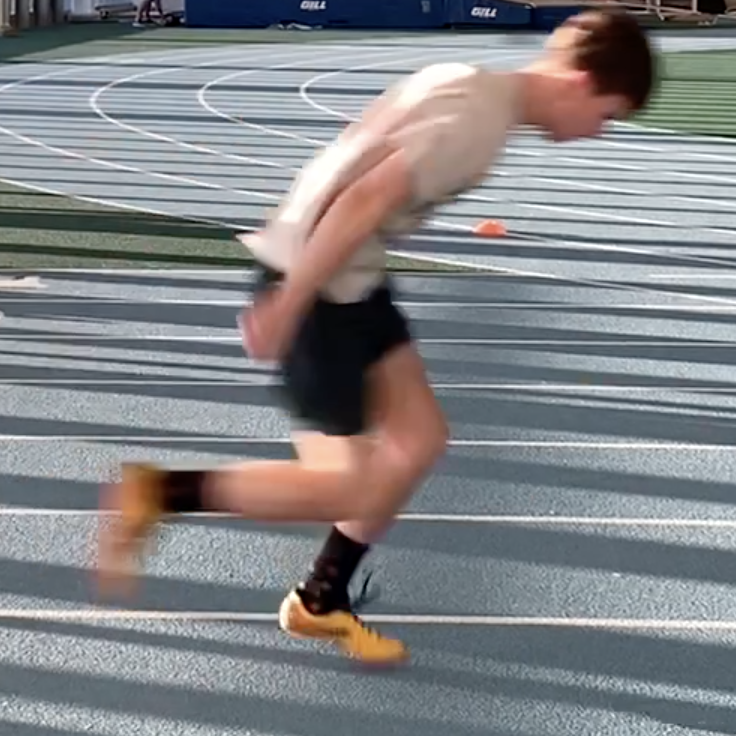

In [23]:
Image(filename="Screen Shot 2023-11-21 at 5.42.33 PM.png")

In [24]:
#Reading the Image
img = cv2.imread("Screen Shot 2023-11-21 at 5.42.33 PM.png")

#Extracting Information
width = img.shape[1]
height = img.shape[0]
channels = img.shape[2]

print("Image Width:", width)
print("Image Height:", height)
print("Number of Channels:", channels)

Image Width: 736
Image Height: 736
Number of Channels: 3


**Resizing the Image for Inspection**

New height and width: 368, 368


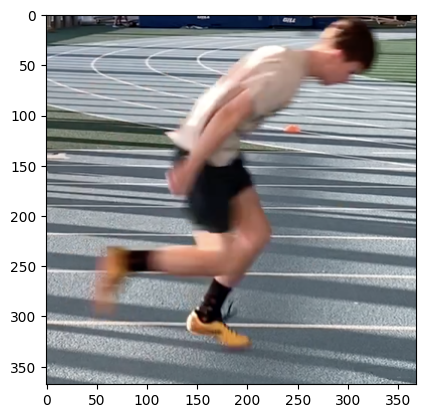

In [25]:
new_size = (368, 368)
print(f"New height and width: {new_size[1]}, {new_size[0]}" )
resized_img = cv2.resize(img, new_size)

changed_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

plt.imshow(changed_img)

**Sharpening the Image Using a Convolution Network**

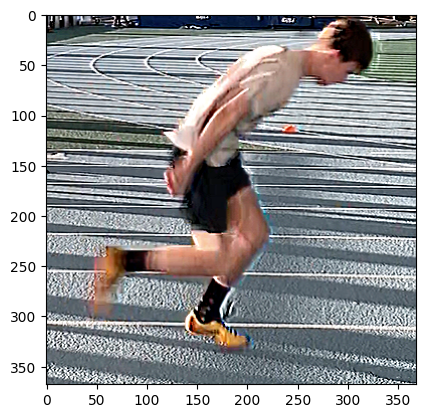

In [26]:
#Creating a filter matrix
kernel = np.array([[0,-1,0], [-3, 3, 3], [0, -1, 0]])

#Applying the filter matrix
sharpened_img = cv2.filter2D(changed_img, -1, kernel)

#Displaying the Image
plt.imshow(sharpened_img)

**Specifying the Model**

In [28]:
if not os.path.isdir("model"):
  os.mkdir("model")

protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "model/pose_iter_160000.caffemodel"

if not os.path.isfile(protoFile):
  #Download the proto file
  urllib.request.urlretrieve('https://raw.githubusercontent.com/CMU-Perceptual-Computing-Lab/openpose/master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt', protoFile)

if not os.path.isfile(weightsFile):
  #Download the model file
  urllib.request.urlretrieve('http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel', weightsFile)

#Reading the Models into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

URLError: ignored

**Setting Points for the Model**

In [ ]:
nPoints = 15
POSE_PAIRS = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], [1, 14], [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]
## POSE_PAIRS Associations
# [["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
# ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
# ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
# ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"]]
# "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
# "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
# "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
# "Background": 15
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

error: ignored

**Converting the Image to Blob**

In [ ]:
netInputSize = (386, 386)
inpBlob = cv2.dnn.blobFromImage(sharpened_img, 1.0 / 255, netInputSize, (0, 0, 0), swapRB=True, crop=False)
net.setInput(inpBlob)

**Running Inference**

In [ ]:
output = net.forward()

error: ignored

In [29]:
# Imprt Libraries
from scipy.spatial import distance as dist
import numpy as np
import pandas as pd
import progressbar
import cv2

In [33]:
protoFile = "openpose-master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "openpose-master/models/pose_iter_160000.caffemodel"

video_path = 'IMG_0903 (3).MOV'
csv_path = 'output/out_1.csv'

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

error: ignored